# Project 1 – Penguin Dataset
Author: Alvin Chan
Student Number: 216606287
Course: EECS4404
Professor: Archit Garg
Python version: 3.6
Anaconda3 verion:4.3.1
SciKit Learn version: 0.18.1
Seaborn version: 0.7.1

Penguin dataset used were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**License & Citation**
* Data are available by CC-0 license in accordance with the Palmer Station LTER Data Policy and the LTER Data Access Policy for Type I data.

* Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

This dataset contains information of about 344 penguins from three islands of Antarctica;Biscoe,Dream,Torgersen, of three species; Adelie, Chinstrp, and Gentoo. The objective of this excersise is to analyze the data and classify the penguins with Machine Learning algorithms; Sector Vector Machines, Random Forest, Boosting Tress.

### Read in Data

In [1]:
#Core libraries
import numpy as np
import pandas as pd
from time import time

#Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

df_penguins = pd.read_csv('penguins_size.csv')
df_penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Clean data

In [2]:
#check for null values
df_penguins.isnull().sum().to_frame('nulls')

,nulls
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


#### Convert `sex` to numeric
note: there is an abnormal entry where 'sex' was '.' and will be mapped to Nan and dropped later

In [3]:
gender_num = {'MALE': 0,'FEMALE': 1}
df_penguins['sex'] = df_penguins['sex'].map(gender_num)

#### Convert `island` to numeric

In [4]:
island_num = {'Biscoe': 0,'Dream': 1,'Torgersen': 2}
df_penguins['island'] = df_penguins['island'].map(island_num)

#### Drop all entries with nan values and verfiy
Filtered dataframe for isnull can verify there is no longer any Nan values

Reasoning to drop data: I beleive that dropping the null data points would have little to no effect on the ML models. I personally prefer provided percisie and accurate to avoid bias towards the mean.

In [5]:
df_penguins = df_penguins.dropna()
df_penguins[df_penguins.isnull().any(axis=1)] #verify no Nan values

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


#### Reset dataframe index because of removed entries

In [6]:
df_penguins.reset_index(drop=True)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,0.0
1,Adelie,2,39.5,17.4,186.0,3800.0,1.0
2,Adelie,2,40.3,18.0,195.0,3250.0,1.0
3,Adelie,2,36.7,19.3,193.0,3450.0,1.0
4,Adelie,2,39.3,20.6,190.0,3650.0,0.0
5,Adelie,2,38.9,17.8,181.0,3625.0,1.0
6,Adelie,2,39.2,19.6,195.0,4675.0,0.0
7,Adelie,2,41.1,17.6,182.0,3200.0,1.0
8,Adelie,2,38.6,21.2,191.0,3800.0,0.0
9,Adelie,2,34.6,21.1,198.0,4400.0,0.0


## Exploratory Data Analysis
#### Descriptive statistics

In [7]:
df_penguins.groupby('species').mean()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,1.020548,38.823973,18.347260,190.102740,3706.164384,0.500000
Chinstrap,1.000000,48.833824,18.420588,195.823529,3733.088235,0.500000
Gentoo,0.000000,47.568067,14.996639,217.235294,5092.436975,0.487395


In [8]:
df_penguins.describe().transpose().drop('count', axis = 1)

,mean,std,min,25%,50%,75%,max
island,0.651652,0.714715,0.0,0.0,1.0,1.0,2.0
culmen_length_mm,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
culmen_depth_mm,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0
sex,0.495495,0.500732,0.0,0.0,0.0,1.0,1.0


In [9]:
df_penguins.corr()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
island,1.000000,-0.337179,0.568031,-0.554413,-0.559526,0.012435
culmen_length_mm,-0.337179,1.000000,-0.228626,0.653096,0.589451,-0.344078
culmen_depth_mm,0.568031,-0.228626,1.000000,-0.577792,-0.472016,-0.372673
flipper_length_mm,-0.554413,0.653096,-0.577792,1.000000,0.872979,-0.255169
body_mass_g,-0.559526,0.589451,-0.472016,0.872979,1.000000,-0.424987
sex,0.012435,-0.344078,-0.372673,-0.255169,-0.424987,1.000000


<AxesSubplot:>

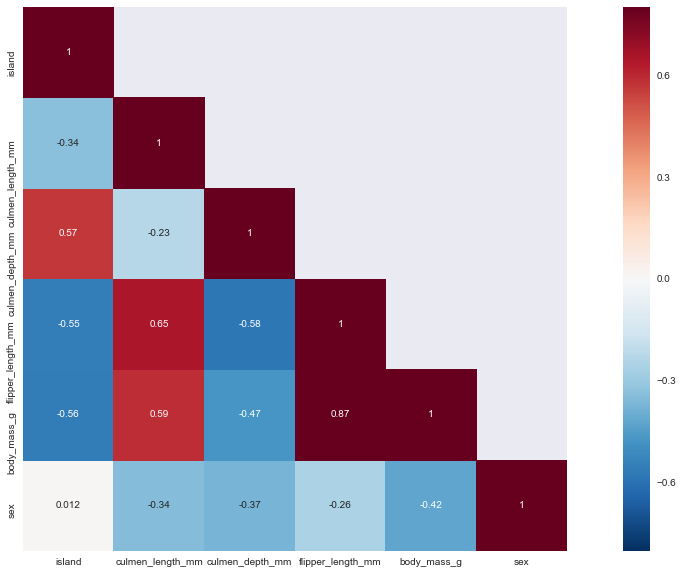

In [10]:
# Correlation analysis
corrMatt = df_penguins.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

#### Statistical analysis
Gentoo penguins have a stand out feature that they are the largest in body mass and flipper length compared to the similar mean values of Adelie and Chinstrap penguins. This is more evident because the correlation table indicated a strong corrolation between flipper length and body mass. Gentoo also reside solely on island 'Biscoe'=0. Lastly, Gentoo have the smallest avaerge culmen depth. With this information, Gentoo should be the most easily distinguished.

Adelie penguins seem to have small culmen length compared to the other two penguins.

Chinstrap penguins only reside on island 'Dream'=1.They have larger Culmen length than Adelie, and marginal differnce to Gentoos. However, Gentoo have drastic differnces to Chinstrap, like differnet islands and culmen depth and body mass, the culmen length can be distinguish in those regards.

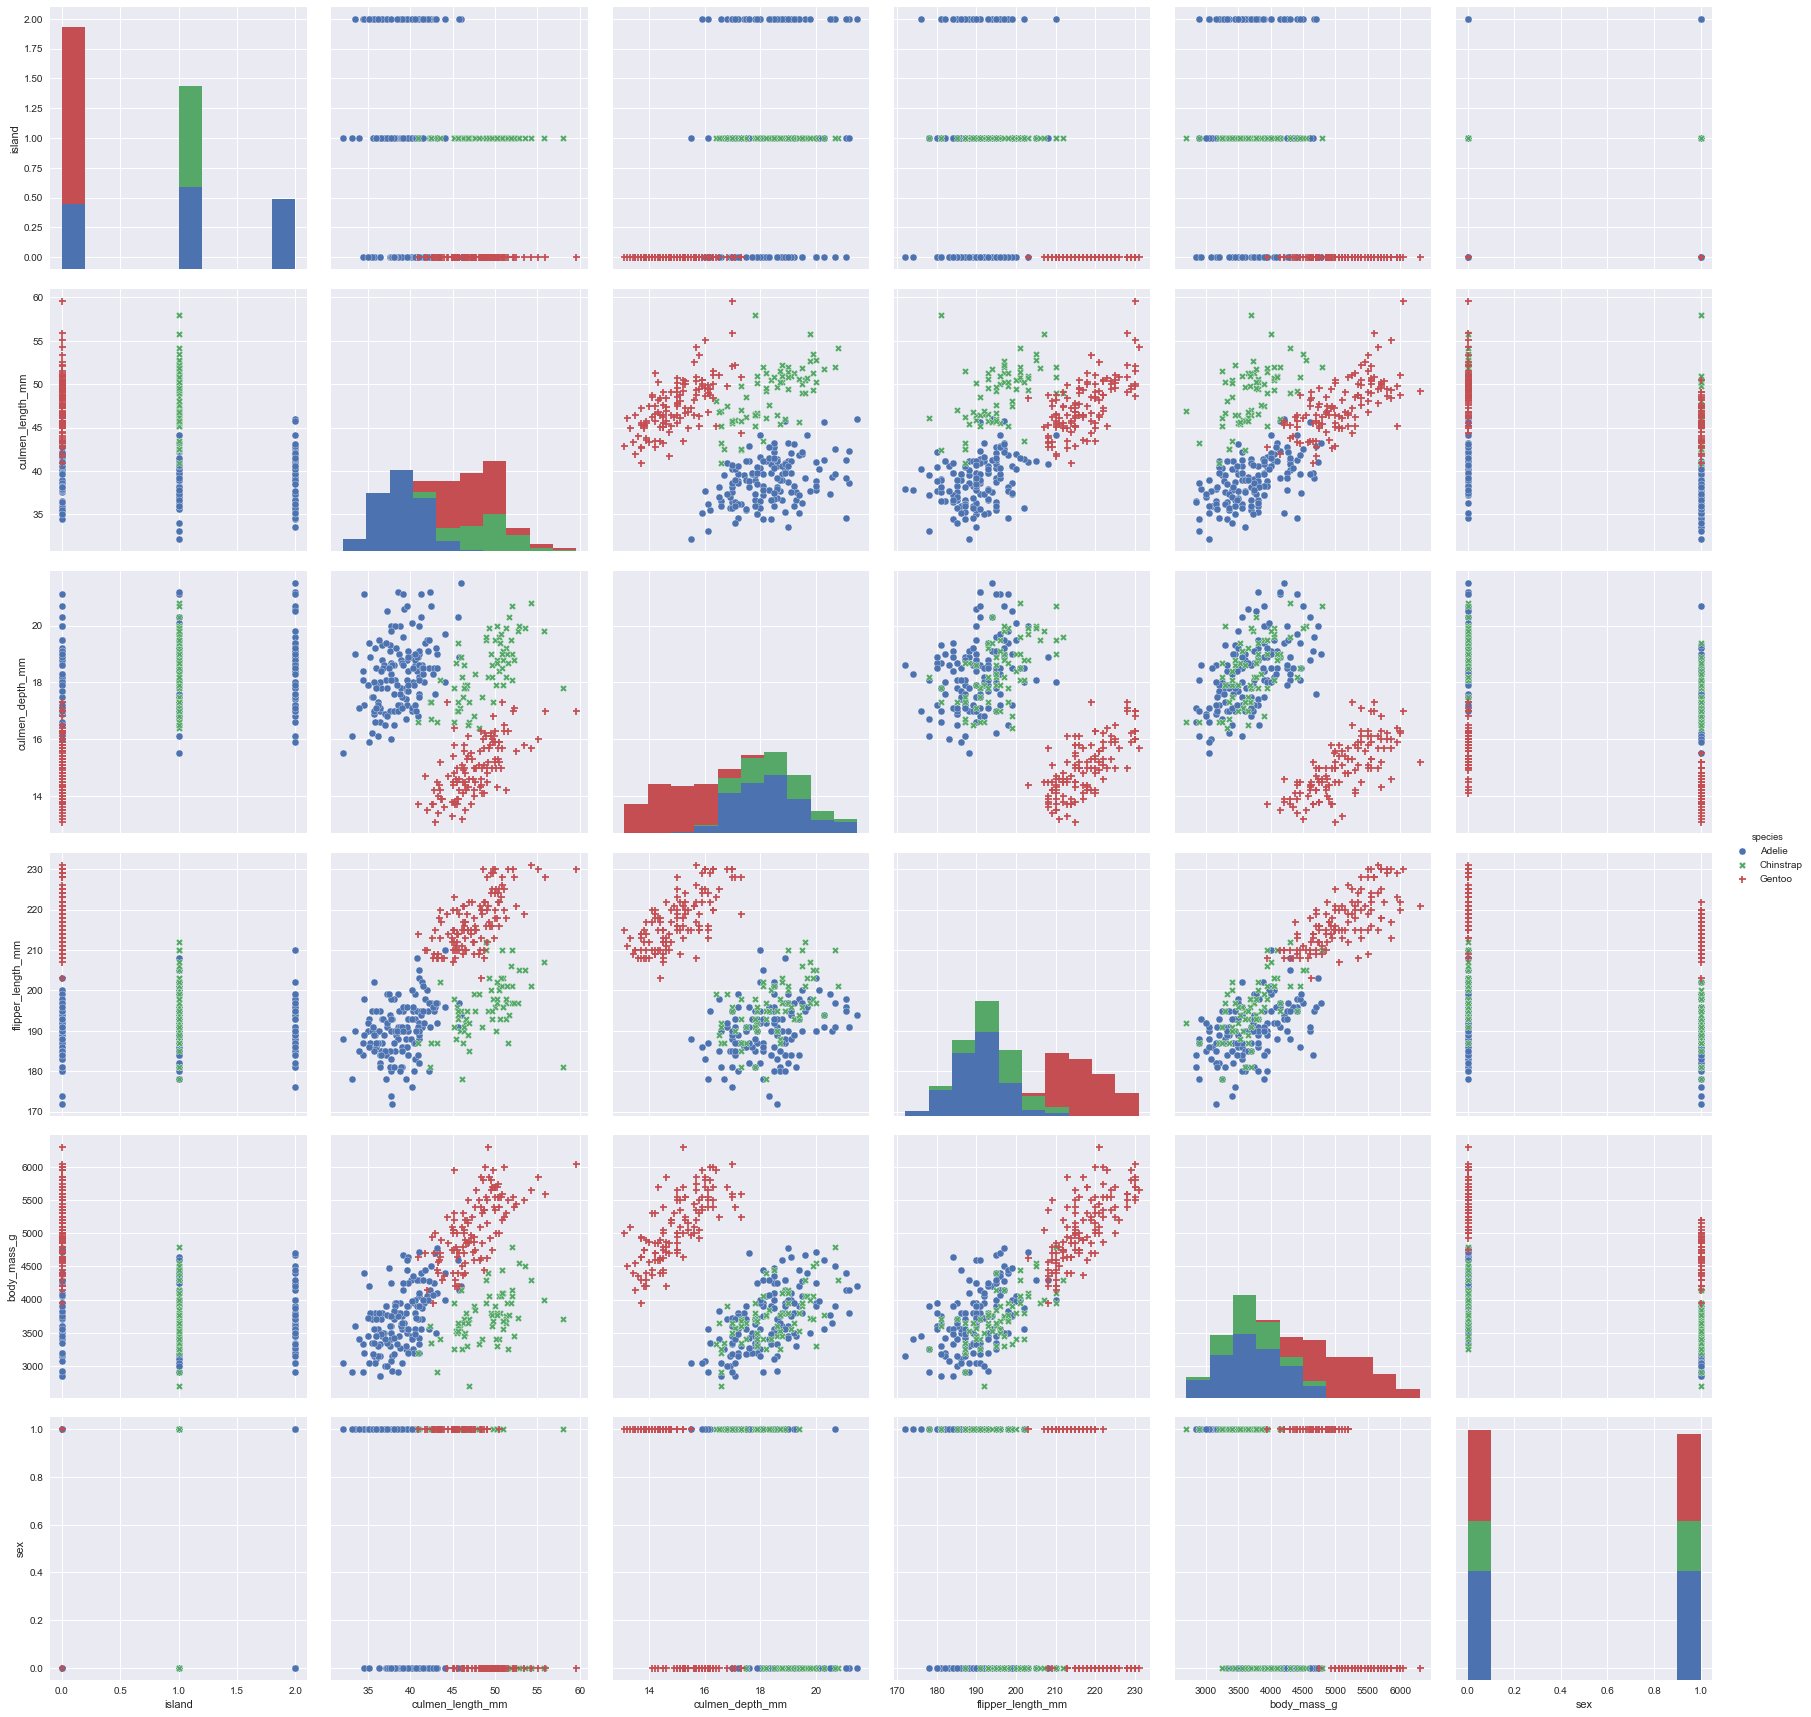

In [11]:
sns.pairplot(df_penguins, hue='species', kind= 'scatter',diag_kind="hist",markers=["o", "X", "+"], size=4)

#### Graphed analysis
Overall the claims within the statistical analysis is further emphisized in the plots.

Firstly, the top left histogram, about the islands, verifies that the Gentoo only live on 'Biscoe'= 0, Chinstrp only live on 'Dream'=1, but Adelie is found on all three islands, but 'Torgersen'=2 only inhabits the Adelie species on the island.

Gentoo penguins are are extremely well seperated from the other penguins when accounting flipper_length_mm and/or body_mass_g. They are so seperated, it would be easy to circle majourity of the cluster. There is probably better plotting methods to demostrate that and would love feedback on that.

As mentioned above, the culmen_length_mm was a strong inticator of the species. Looking at the plots, the culmen_length_mm compared with another continouse feature visible shows distinct cluster for each species with minimal overalaping datapoints. This enables our ML models to potentially easily distinguish penguin species with high accuracy when in combination with other factors.

## Split into training, validation, and test set
Two different ratios of training, validation and test data: 60-20-20 & 80-10-10

In [12]:
features = df_penguins.drop('species', axis=1)
labels = df_penguins['species']

In [13]:
#60-20-20
penguin_features, test_features, penguin_labels, test_labels = train_test_split(features, labels, test_size=0.4, random_state=42)
test_features, val_features, test_labels, val_labels = train_test_split(test_features, test_labels, test_size=0.5, random_state=42)
for dataset in [penguin_labels, val_labels, test_labels]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [14]:
#80-10-10
penguin_features2, test_features2, penguin_labels2, test_labels2 = train_test_split(features, labels, test_size=0.2, random_state=42)
test_features2, val_features2, test_labels2, val_labels2 = train_test_split(test_features2, test_labels2, test_size=0.5, random_state=42)
for dataset in [penguin_labels2, val_labels2, test_labels2]:
    print(round(len(dataset) / len(labels), 2))

0.8
0.1
0.1


## Grid Search CV to find optimal hyperparameters for SVC,RF,Boosting

The ML models were intially chosen at random. However, I felt the chosen algorithms have an intresting results. I believe it would have been best to have Logistic Regression, as it is good for classification with limited data, particularly well defined clusters as shown in the plots. But regardless, I felt it was a good experience to try other algorithms that I had less familarity and make insightful observations in my analysis.

In [15]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

#### Hyperparameter tuning 60-20-20

In [ ]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv_svc = GridSearchCV(svc, parameters, cv=5)
cv_svc.fit(penguin_features, penguin_labels.values.ravel())

print_results(cv_svc)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.985 (+/-0.04) for {'C': 0.1, 'kernel': 'linear'}
0.407 (+/-0.008) for {'C': 0.1, 'kernel': 'rbf'}
0.98 (+/-0.038) for {'C': 1, 'kernel': 'linear'}
0.563 (+/-0.093) for {'C': 1, 'kernel': 'rbf'}
0.975 (+/-0.045) for {'C': 10, 'kernel': 'linear'}
0.573 (+/-0.092) for {'C': 10, 'kernel': 'rbf'}


In [ ]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv_rf = GridSearchCV(rf, parameters, cv=5)
cv_rf.fit(penguin_features, penguin_labels.values.ravel())

print_results(cv_rf)

In [ ]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv_gb = GridSearchCV(gb, parameters, cv=5)
cv_gb.fit(penguin_features, penguin_labels.values.ravel())

print_results(cv_gb)

#### Hyperparameter tuning 80-10-10

In [ ]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv_svc2 = GridSearchCV(svc, parameters, cv=5)
cv_svc2.fit(penguin_features2, penguin_labels2.values.ravel())
print_results(cv_svc2)

In [ ]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv_rf2 = GridSearchCV(rf, parameters, cv=5)
cv_rf2.fit(penguin_features2, penguin_labels2.values.ravel())

print_results(cv_rf2)

In [ ]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv_gb2 = GridSearchCV(gb, parameters, cv=5)
cv_gb2.fit(penguin_features2, penguin_labels2.values.ravel())
print_results(cv_gb2)

#### Best Parameters 60-20-20

In [ ]:
print('BEST PARAMS: {}\n'.format(cv_svc.best_params_))
print('BEST PARAMS: {}\n'.format(cv_rf.best_params_))
print('BEST PARAMS: {}\n'.format(cv_gb.best_params_))

#### Best Parameters 80-10-10

In [ ]:
print('BEST PARAMS: {}\n'.format(cv_svc2.best_params_))
print('BEST PARAMS: {}\n'.format(cv_rf2.best_params_))
print('BEST PARAMS: {}\n'.format(cv_gb2.best_params_))

## Plot Learning Curve
using the learning curve function from scikit-learn

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


#### Plot Learning curves 60-20-20

In [ ]:
title = "Learning Curves (SVC, {} kernel)".format(cv_svc.best_params_['kernel'])
plot_learning_curve(
    cv_svc.best_estimator_, title, penguin_features, penguin_labels.values.ravel(),  ylim=(0.7, 1.01), cv=5, n_jobs=4
)

title = "Learning Curves (Random Forest)"
plot_learning_curve(
    cv_rf.best_estimator_, title, penguin_features, penguin_labels.values.ravel(),  ylim=(0.7, 1.01), cv=5, n_jobs=4
)

title = "Learning Curves (Gradient Boosting)"
plot_learning_curve(
    cv_gb.best_estimator_, title, penguin_features, penguin_labels.values.ravel(),  ylim=(0.7, 1.01), cv=5, n_jobs=4
)
plt.show()

#### Plot Learning curves 80-10-10

In [ ]:
title = "Learning Curves (SVC, {} kernel)".format(cv_svc2.best_params_['kernel'])
plot_learning_curve(
    cv_svc2.best_estimator_, title, penguin_features2, penguin_labels2.values.ravel(), ylim=(0.75, 1.01), cv=5, n_jobs=4
)

title = "Learning Curves (Random Forest)"

plot_learning_curve(
    cv_rf2.best_estimator_, title, penguin_features2, penguin_labels2.values.ravel(), ylim=(0.75, 1.01), cv=5, n_jobs=4
)

title = "Learning Curves (Gradient Boosting)"
plot_learning_curve(
    cv_gb2.best_estimator_, title, penguin_features2, penguin_labels2.values.ravel(), ylim=(0.75, 1.01), cv=5, n_jobs=4
)
plt.show()

#### Evaluate models on the validation set and test set
Macro average scores were selected off the bases that none of the class are weighted with any support values
note: I noticed my latency to be 0.00ms for some models and sets. I would presume this is due to computer specifcations and would differ on computers.

In [ ]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred,average='macro'), 3)
    recall = round(recall_score(labels, pred,average='macro'), 3)
    print('{0} -- Accuracy: {1:.2f} / Precision: {2:.2f} / Recall: {3:.2f} / Latency: {4:.2f}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

#### Validation set 60-20-20

In [ ]:
evaluate_model("SVC", cv_svc.best_estimator_, val_features, val_labels)
evaluate_model("RF", cv_rf.best_estimator_, val_features, val_labels)
evaluate_model("GB", cv_gb.best_estimator_, val_features, val_labels)

#### Test set 60-20-20

In [ ]:
evaluate_model("SVC", cv_svc.best_estimator_, test_features, test_labels)
evaluate_model("RF", cv_rf.best_estimator_, test_features, test_labels)
evaluate_model("GB", cv_gb.best_estimator_, test_features, test_labels)

### Analysis of 60-20-20 model results

The SVC model had astonishing results of perfect performance while a low latency of 1 ms. This is most likely because the dataset have distinct clusters that in the multidimensional plane could easily seperate. For example, given the island, culmen depth, and body_mass, it is possible to predict majourity of the data provided as they will be distinct clusters in 3 dimensions. This is also the primary reason the kernal with the best performance was linear, the species are fairly distinct.
RF and GB model performed wonderfully but the dataset is heavily favour for SVC model.
RF has the largest latency time because of its inheriant nature of large depths and the voting processes.

Overall, SVC is the best performing model, given the distinct nature of the dataset.


#### Validation set 80-10-10

In [ ]:
evaluate_model("SVC", cv_svc2.best_estimator_, val_features2, val_labels2)
evaluate_model("RF", cv_rf2.best_estimator_, val_features2, val_labels2)
evaluate_model("GB", cv_gb2.best_estimator_, val_features2, val_labels2)

#### Test set 80-10-10

In [ ]:
evaluate_model("SVC", cv_svc2.best_estimator_, test_features2, test_labels2)
evaluate_model("RF", cv_rf2.best_estimator_, test_features2, test_labels2)
evaluate_model("GB", cv_gb2.best_estimator_, test_features2, test_labels2)

### Analysis of 80-10-10 model results
All the models had perfect results. This is likely due to the larger training sets benifiting the RF and GB model's decision making. The Latency of both SVC and GB are near zero, for their prediction speed making them both great models. RF stands out with the magnitude of the latency to be considered unessary compared to the other models. If comparing between the SVC model and the GB model, I believe their are benifits of the flexibilty of the GB model. It is a more general ML model that could predict faster and overall perform better if the dataset increases with unique data.

## What was the best split ratio of data? 60-20-20 or 80-10-10

With both achieving perfect performance in the SVC model, I believe it is best to reduce the training data to the point that a near perfect model is possible. There fore 60-20-20 is better to demonstrate the effectiveness of a model without over training the models as shown in the 80-10-10 results, where all three models had perfect performance. With this problem type being classification, it is best to have more validation and test data to understand the performance of the model in future classifications of the three penguin species.

I would like to note, it is possible that a even smaller training ratio would be best for the problem, ie 50-25-25, but I have not conducted the experiement to make any claims on that. I would like to also state, maybe the other algorithms like LR could perform better, but that is beyond the instructions of the project.

#References

Penguin dataset used were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

* Data are available by CC-0 license in accordance with the Palmer Station LTER Data Policy and the LTER Data Access Policy for Type I data.

* Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Citing libraries

* D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.

* Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

* @article{Waskom2021,
    doi = {10.21105/joss.03021},
    url = {https://doi.org/10.21105/joss.03021},
    year = {2021},
    publisher = {The Open Journal},
    volume = {6},
    number = {60},
    pages = {3021},
    author = {Michael L. Waskom},
    title = {seaborn: statistical data visualization},
    journal = {Journal of Open Source Software}
 }